# Chapter 6 - Exercise 3: NBA Players

## Cho dữ liệu nba_2013.csv
## Sử dụng thuật toán Decision Tree để dự đoán số điểm (points) mà các cầu thủ NBA ghi được trong mùa giải 2013-2014.

## Mỗi hàng trong dữ liệu chứa thông tin về player thực hiện trong mùa giải 2013-2014 NBA. Với:
+ player -- tên player
+ pos -- vị trí của player
+ g -- số trận mà player đã tham gia
+ gs -- số trận mà player đã bắt đầu
+ pts -- tổng số point mà player đã ghi được)

## Requirements:
1. Đọc dữ liệu và gán cho biến data. Xem thông tin data: shape, type, head(), tail(), info. Tiền xử lý dữ liệu (nếu cần)
2. Tạo inputs data với các cột không có giá trị null trừ cột 'player', 'bref_team_id', 'season','season_end', 'pts', và outputs data với 1 cột là 'pts' => Vẽ biểu đồ quan sát mối liên hệ giữa
inputs và outputs data
3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
4. Thực hiện Decision Tree với X_train, y_train
5. Dự đoán y từ X_test => so sánh với y_test
6. Xem kết quả => Nhận xét model
7. Ghi model nếu model phù hợp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

np.set_printoptions(suppress = True)

In [2]:
nba = pd.read_csv('Data/nba_2013.csv')
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [4]:
nba = nba.dropna()

x = nba.drop(['player', 'bref_team_id', 'season','season_end', 'pts'], axis=1)
y = nba['pts']

## <span style='color:yellow'> Build Decision Tree Regressor

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

Accuracy score of Tree_Classifier on train set: 0.9653358376527417
Accuracy score of Tree_Classifier on test set: 0.9481952901308618



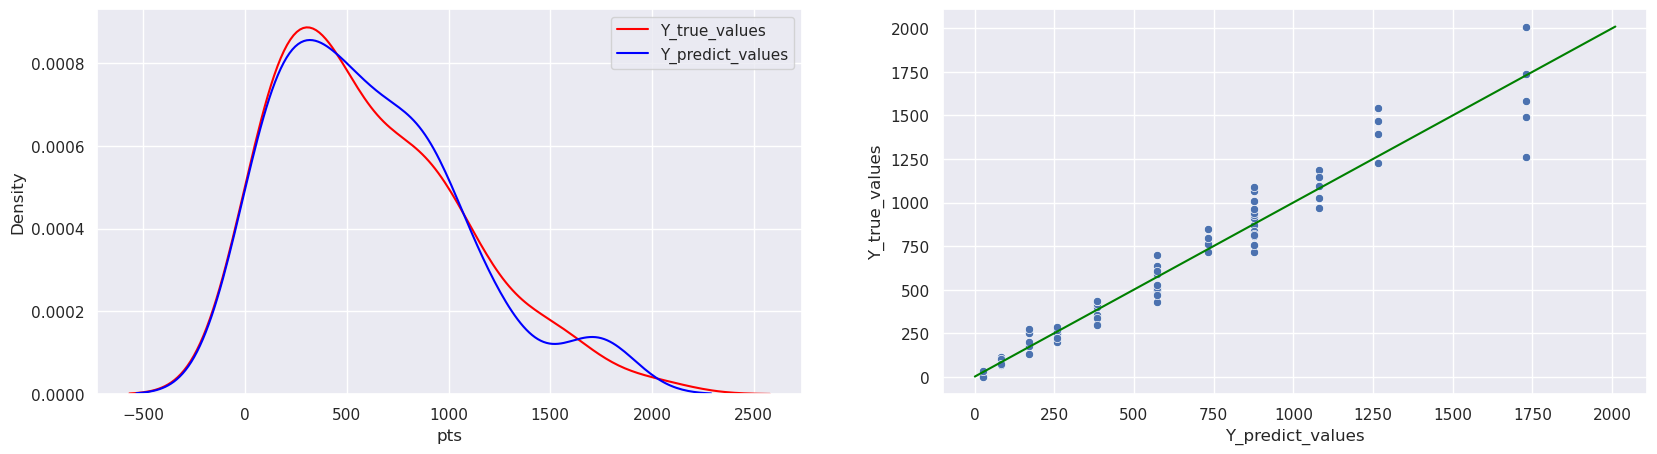

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from imblearn.pipeline import Pipeline

treeR_pipe = Pipeline([
    ('OneHotEncoder', make_column_transformer( (OneHotEncoder(handle_unknown='ignore', drop='first'), ['pos']), remainder='passthrough') ),
    ('Tree_Regressor', DecisionTreeRegressor(criterion='squared_error', min_samples_split=50))
])

treeR_pipe.fit(x_train, y_train)

y_test_pred = treeR_pipe.predict(x_test)


print(f'Accuracy score of Tree_Classifier on train set: {treeR_pipe.score(x_train, y_train)}')
print(f'Accuracy score of Tree_Classifier on test set: {treeR_pipe.score(x_test, y_test)}')
print()

sbn.set_theme(style='darkgrid')
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sbn.kdeplot(x = y_test, color = 'red', label = 'Y_true_values')
sbn.kdeplot(x = y_test_pred, color = 'blue', label = 'Y_predict_values')
plt.legend()

plt.subplot(1,2,2)
sbn.lineplot(x = [y_test.min(), y_test.max()], y = [y_test.min(), y_test.max()], color='green')
sbn.scatterplot(x = y_test_pred, y = y_test)
plt.xlabel('Y_predict_values')
plt.ylabel('Y_true_values')

plt.show()

## <span style='color:yellow'> Visualize Decision Tree Regressor

In [22]:
features = treeR_pipe.named_steps['OneHotEncoder'].get_feature_names_out()

features_cleaned = [feat.replace('onehotencoder__', '').replace('remainder__', '') for feat in features]
print(features_cleaned)

del features

['pos_G', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']


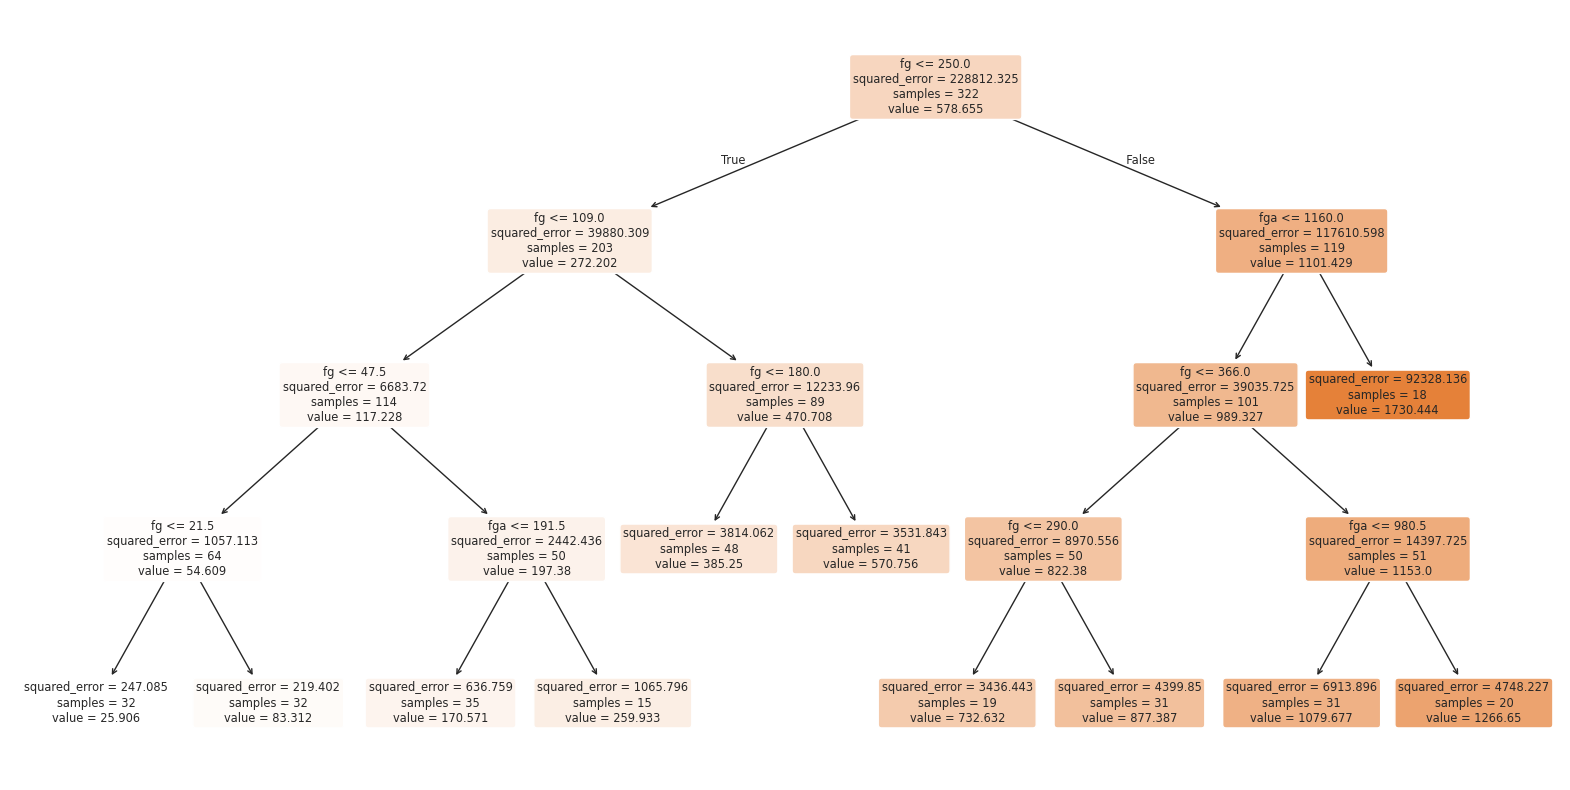

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(treeR_pipe.named_steps['Tree_Regressor'],
         filled = True,
         feature_names = features_cleaned,
         class_names = ['e','p'],
         rounded=True,                
          proportion=False)

plt.show()